# Task 1 : 

# - Customer Behavior Analysis. 

## 1- Importing Libraries.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Loading data of transaction
df = pd.read_excel(r"C:\Users\user\Documents\Forage\QVI_transaction_data.xlsx")

# Convert the dataset format into CSV 
df.to_csv("Uodate_QVI_transaction_data.csv", index = False)


## 2- Exploring data.


In [3]:
# Show frist 5 rows 
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# print the dimention and information about data 
print(df.shape)
df.info()

(264836, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
# Describe data
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


## 3- Check the missing values and dublicated rows

In [6]:
print("the number of null values :\n" , df.isnull().sum())
print("Dublicated rows : ",df.duplicated().sum())

# Drop the dublicated rows 
df.drop_duplicates(inplace=True)

# Check dublicated rows after drop
print("Dublicated rows after drop : ",df.duplicated().sum())


the number of null values :
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
Dublicated rows :  1
Dublicated rows after drop :  0


## 4- Check the outliers and handling it .

In [7]:
# Check the Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Boolean mask where True means the value is an outlier
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Print or count outliers
outliers.sum() # Number of outliers per column


C:\Users\user\AppData\Local\Temp\ipykernel_6968\1482233995.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


DATE                  0
LYLTY_CARD_NBR       44
PROD_NAME             0
PROD_NBR              0
PROD_QTY          28797
STORE_NBR             0
TOT_SALES           578
TXN_ID                1
dtype: int64

#### Commint :
   - Columns(LYLTY_CARD_NBR, PROD_QTY, TOT_SALES ) have outliers. we will study it to learn a bout it . 

##### 1- PROD_QTY Column : 

In [8]:
df['PROD_QTY'].value_counts()

2      236038
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [9]:
# Proudect QTY Outliers 
df.sort_values(by = "PROD_QTY" , ascending = False).head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
204367,43327,223,223025,223075,8,Smiths Crinkle Cut Chips Original 170g,5,14.5
55501,43602,164,164072,164241,36,Kettle Chilli 175g,5,27.0
69815,43326,257,257208,257019,45,Smiths Thinly Cut Roast Chicken 175g,5,15.0
150529,43603,75,75193,74198,25,Pringles SourCream Onion 134g,5,18.5
5160,43600,82,82189,81669,46,Kettle Original 175g,5,27.0
217211,43329,190,190197,191407,2,Cobs Popd Sour Crm &Chives Chips 110g,5,19.0
150541,43328,79,79224,77721,62,Pringles Mystery Flavour 134g,5,18.5
135225,43600,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5


### Outlier Analysis for 'PROD_QTY':
- After identifying outliers using the IQR method, we investigated the extreme values in the 'PROD_QTY' column.
- The largest values (e.g., 200 units) appear to be valid and realistic based on their corresponding 'TOT_SALES' values.
- For example, 200 units of 'Dorito Corn Chp Supreme 380g' cost 650, which gives a unit price of 3.25—completely reasonable.
- Therefore, while these are statistical outliers, they are likely valid transactions (e.g., bulk purchases, events).
- We will NOT remove these outliers as they represent meaningful, high-volume purchases.


##### 2- LYLTY_CARD_NBR Column :
- Note: Although outliers were detected in the 'LYLTY_CARD_NBR' column using the IQR method,
- this column represents customer loyalty card IDs.
- These are unique identifiers, so high or rare values are expected and not problematic.
- Therefore, no action will be taken for these outliers.


##### 3-TOT_SALES Column :

In [10]:
# Check the value counts of TOT_SALES.
df.sort_values(by = "TOT_SALES" , ascending = False).head(30)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
171815,43329,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
150683,43605,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
55558,43599,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
69496,43327,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
184969,43605,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
117850,43604,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
5179,43327,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
185344,43602,180,180233,182542,23,Cheezels Cheese 330g,5,28.5


##### Comment : 
- Upon reviewing the transactions with the highest TOT_SALES values (e.g., 650.0), we found that they were associated with 
- a purchase of 200 units of 'Dorito Corn Chp Supreme 380g'. 
- The calculated unit price is 3.25, which is consistent with other products in the dataset, 
- indicating that this is a valid bulk transaction and not a data error.

###### For other entries with TOT_SALES around 27.0 to 29.5, they involve the purchase of 5 units of premium-sized chip products 
- (e.g., 330g or 380g bags). The resulting unit price is approximately 5.4 to 5.9, which is higher than regular-size products (usually priced around 3.5–4.0 per unit). However, this is reasonable given the larger packaging size.

##### Conclusion:
- These high TOT_SALES values are not errors but are associated with valid product sizes and quantities.
- Therefore, no filtering is required based solely on these outlier values.


## 5- Editing the format of Date column.


In [11]:
df['DATE'] = pd.to_datetime(df['DATE'], origin='1899-12-30', unit='D')
df['DATE'].head(20)

0    2018-10-17
1    2019-05-14
2    2019-05-20
3    2018-08-17
4    2018-08-18
5    2019-05-19
6    2019-05-16
7    2019-05-16
8    2018-08-20
9    2018-08-18
10   2019-05-17
11   2018-08-20
12   2019-05-18
13   2018-08-17
14   2019-05-15
15   2019-05-19
16   2018-08-18
17   2018-08-14
18   2018-08-17
19   2019-05-16
Name: DATE, dtype: datetime64[ns]

 # - Customer Analysis.

## 1- Exploring the data .

In [12]:
df_2 = pd.read_csv(r"C:\Users\user\Documents\Forage\QVI_purchase_behaviour.csv")
df_2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [13]:
# Check the dimention of dataset
df_2.shape

(72637, 3)

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


## 2- Check the missing values and dublicated rows

In [15]:
print(df_2.isnull().sum())  #to check the missing values.
print("The number of dublicated rows is : " ,df_2.duplicated().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
The number of dublicated rows is :  0


# - Sales and Behavior Analysis.

In [16]:
merged_data = pd.merge(df , df_2 , on = 'LYLTY_CARD_NBR' , how = 'inner' )
merged_data.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
6,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
7,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget
9,2018-08-09,4,4074,2979,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,MIDAGE SINGLES/COUPLES,Budget


## 1- Sales analysis based on Date.

DATE
2018-07-01    5372.2
2018-07-02    5315.4
2018-07-03    5321.8
2018-07-04    5309.9
2018-07-05    5080.9
2018-07-06    5604.9
2018-07-07    5378.3
2018-07-08    5021.1
2018-07-09    5518.9
2018-07-10    5068.5
2018-07-11    5410.1
2018-07-12    5557.4
2018-07-13    5539.2
2018-07-14    5245.5
2018-07-15    5638.4
2018-07-16    5347.2
2018-07-17    5501.8
2018-07-18    5376.4
2018-07-19    5308.6
2018-07-20    5331.4
Name: TOT_SALES, dtype: float64 

the number of days : 364
the 20 top sales is : 
 DATE
2018-12-24    6923.0
2018-12-23    6826.0
2018-12-19    6639.8
2018-12-22    6558.7
2018-12-20    6300.8
2018-12-18    6209.6
2018-12-21    6201.3
2019-06-07    5924.1
2018-09-06    5864.5
2018-11-20    5857.2
2019-06-14    5766.7
2018-09-23    5757.0
2018-09-25    5753.6
2018-10-26    5753.0
2019-06-15    5752.0
2019-04-20    5722.1
2018-08-06    5703.7
2019-03-22    5696.3
2018-10-09    5695.8
2018-11-11    5689.1
Name: TOT_SALES, dtype: float64


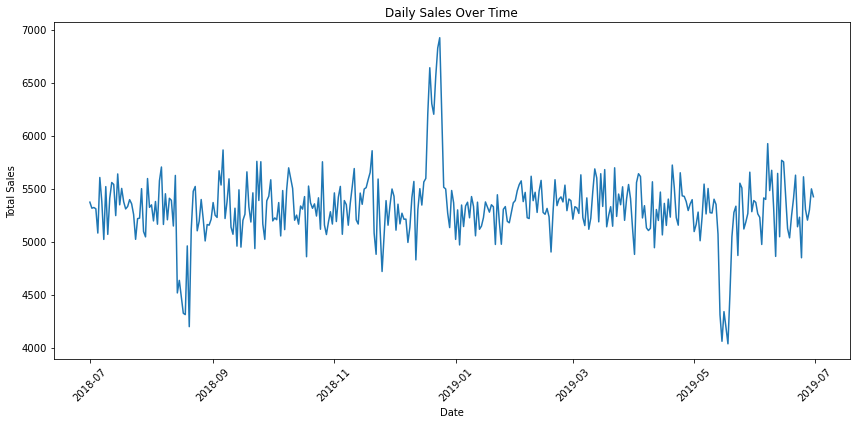

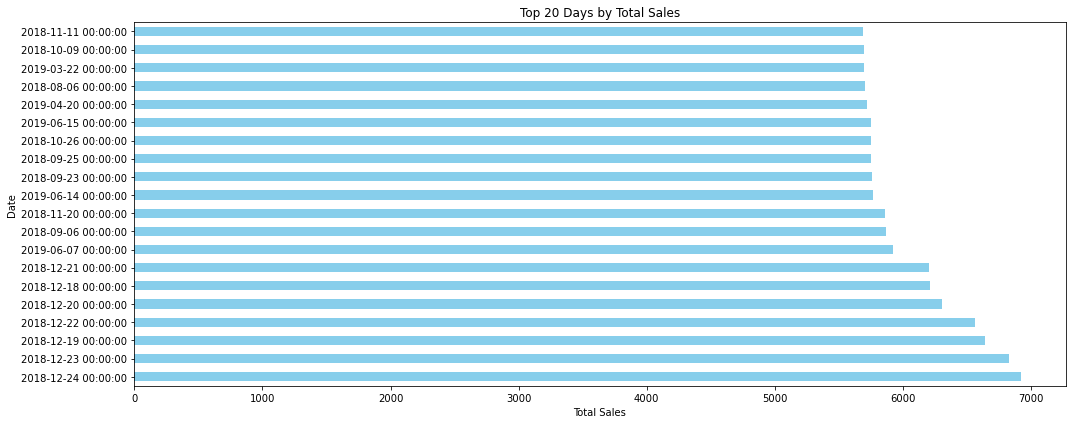

Weekday
Friday       279521.30
Wednesday    277876.40
Saturday     275612.60
Monday       274959.95
Thursday     272565.65
Tuesday      270644.00
sunday             NaN
Name: TOT_SALES, dtype: float64


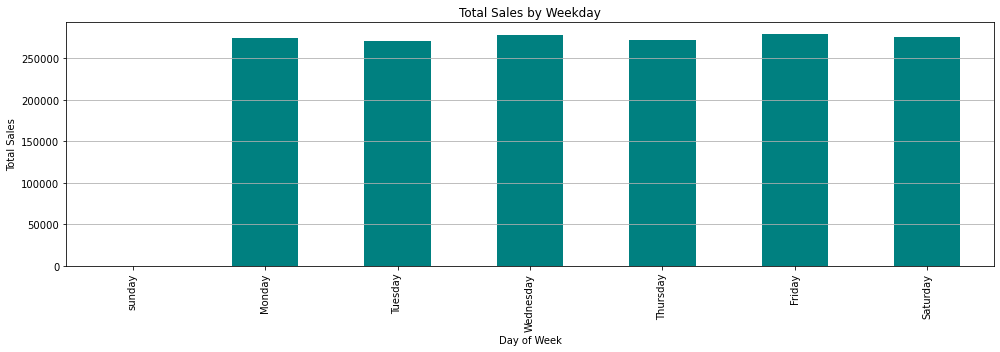

In [17]:
# Study the daily sales
daily_sales = merged_data.groupby("DATE")["TOT_SALES"].sum()

print(daily_sales.head(20), "\n" )   # Show the 20 rows in daily sales

print("the number of days :" ,daily_sales.count())     # Show the number of days

# Show the date of 20 top sales.
top_20_sales = daily_sales.sort_values( ascending = False).head(20)
print("the 20 top sales is : \n" ,top_20_sales)

# Visulisation of the daily sales
daily_sales_df = daily_sales.reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales_df, x='DATE', y='TOT_SALES')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visulisation of days of 20 top sales.
plt.figure(figsize=(15,6))
top_20_sales.plot(kind='barh', color='skyblue')  
plt.title('Top 20 Days by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

# Weekday Analysis
merged_data["Weekday"] = merged_data['DATE'].dt.day_name()
Week_sales = merged_data.groupby('Weekday')["TOT_SALES"].sum()

Week_Oreder = ["sunday" , "Monday" ,"Tuesday" ,'Wednesday', 'Thursday', 'Friday', 'Saturday']     # Order days of week 

Week_sales = Week_sales.reindex(Week_Oreder)       # Ranking the week sales table according to the week order

print(Week_sales.sort_values(ascending = False).head(20))
# Visulization 
plt.figure(figsize=(14,5))
Week_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Analysis of the sales data and visualizations:

1. **Daily Sales Overview:**
   - Sales fluctuate between 4,000 and 6,000 units.
   - A significant spike occurs in December 2018, with sales peaking at 6,923 units on December 24.
   - A notable dip is observed around May 2019.

2. **Top Sales Days:**
   - December 2018 dominates the top sales days, with multiple entries in the top 20.
   - Other high sales days are scattered across June 2019, September 2018, and October 2018.

3. **Weekly Sales Pattern:**
   - Friday is the highest sales day, followed closely by Wednesday and Saturday.
   - Sales are consistent across weekdays, with Tuesday being the lowest.
   - No sales are recorded on Sundays, indicating the business is likely closed.

4. **Visual Insights:**
   - The time series plot shows regular fluctuations with a clear peak in December.
   - The bar chart of top sales days highlights the dominance of December 2018.
   - The weekday sales chart confirms consistent performance across the week, except for Sunday.

5. **Business Implications:**
   - The business benefits from strong holiday season sales.
   - Consistent weekday sales suggest stable operations and customer traffic.
   - Consideration could be given to opening on Sundays if feasible, given the strong Saturday performance.


# 2- Products Analysis .

top_20_product PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Kettle Honey Soy    Chicken 175g            32578.2
Kettle Chilli 175g                          31271.4
Old El Paso Salsa   Dip Chnky Tom Ht300g    30513.3
Old El Paso Salsa   Dip Tomato Med 300g     30237.9
Old El Paso Salsa   Dip Tomato Mild 300g    30033.9
Kettle Tortilla ChpsHny&Jlpno Chili 150g    29021.4
Kettle Sensations   Camembert & Fig 150g    28308.4
Twisties Chicken270g                        27853.0
Kettle Tortilla ChpsBtroot&Ricotta 150g

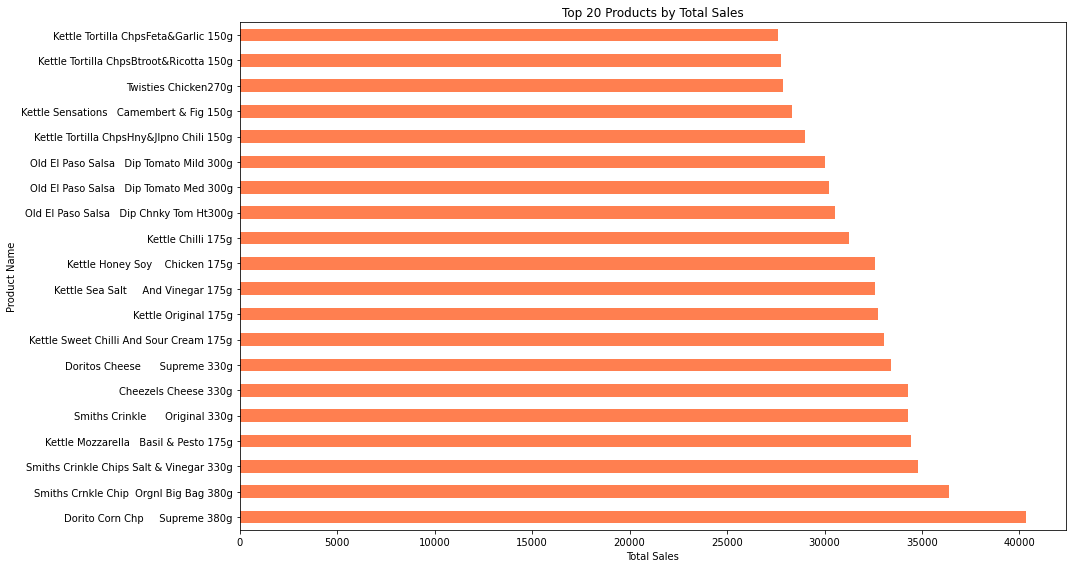

PROD_NAME
Dorito Corn Chp     Supreme 380g            6509
Kettle Mozzarella   Basil & Pesto 175g      6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g    6309
Cobs Popd Sea Salt  Chips 110g              6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    6256
Tostitos Splash Of  Lime 175g               6234
Tyrrells Crisps     Ched & Chives 165g      6227
Kettle 135g Swt Pot Sea Salt                6212
Infuzions Thai SweetChili PotatoMix 110g    6206
Thins Potato Chips  Hot & Spicy 175g        6185
Doritos Corn Chips  Cheese Supreme 170g     6180
Smiths Crnkle Chip  Orgnl Big Bag 380g      6164
Kettle Sensations   Camembert & Fig 150g    6157
Doritos Corn Chip Mexican Jalapeno 150g     6125
Kettle Sweet Chilli And Sour Cream 175g     6120
Pringles Barbeque   134g                    6112
Smiths Crinkle Chips Salt & Vinegar 330g    6106
Thins Chips Light&  Tangy 175g              6095
Doritos Corn Chip Southern Chicken 150g     6086
Infuzions BBQ Rib   Prawn Crackers 110g     6084
Name: PROD

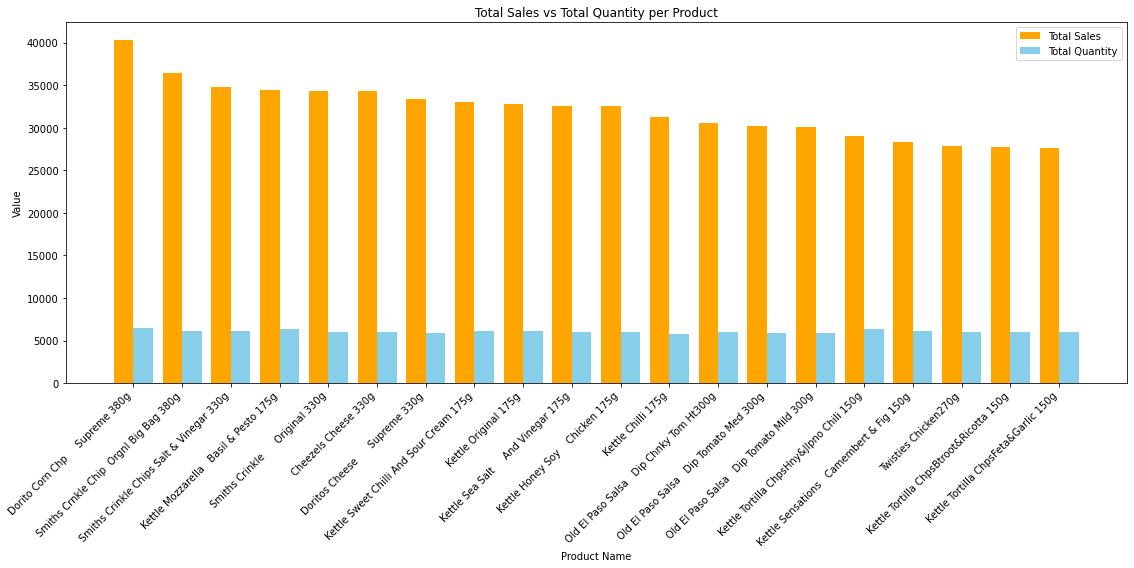

In [18]:
# 1- Product Name according to total sales
product_sales = merged_data.groupby("PROD_NAME")["TOT_SALES"].sum().sort_values(ascending = False)
top_20_product = product_sales.head(20)
print("top_20_product" , top_20_product)

# Visulization 
plt.figure(figsize=(15, 8))
top_20_product.plot(kind='barh', color='coral')
plt.title('Top 20 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


# 2- Products and Quantities
products_Quantity = merged_data.groupby("PROD_NAME")["PROD_QTY"].sum().sort_values()
top_20_quantity = products_Quantity.sort_values(ascending = False).head(20)
print(top_20_quantity)

# 3-Merge the Products , Quantities and Total Sales
product_state = pd.DataFrame({"Total_QNT" : products_Quantity , "Total_Sales" :product_sales })
top_products_stats=product_state.sort_values(by = "Total_Sales" , ascending = False).head(20)
print(top_products_stats)
# Visualistion
x = np.arange(len(top_products_stats))  # X-axis
width = 0.4  # weidth column 

plt.figure(figsize=(16, 8))

# Sales Columns
plt.bar(x - width/2, top_products_stats['Total_Sales'], width, label='Total Sales', color='orange')

# Quantity Columns
plt.bar(x + width/2, top_products_stats['Total_QNT'], width, label='Total Quantity', color='skyblue')

plt.xticks(x, top_products_stats.index, rotation=45, ha='right')

plt.xlabel('Product Name')
plt.ylabel('Value')
plt.title('Total Sales vs Total Quantity per Product')
plt.legend()
plt.tight_layout()
plt.show()


### Analysis of the top 20 products by total sales and quantity:

1. **Top Products by Total Sales:**
   - **Dorito Corn Chip Supreme 380g** leads with total sales of 40,352.0.
   - **Smiths Crinkle Chip Original Big Bag 380g** and **Smiths Crinkle Chips Salt & Vinegar 330g** follow closely.
   - Kettle brand products are prominent, with multiple flavors in the top 20.

2. **Top Products by Quantity Sold:**
   - **Dorito Corn Chip Supreme 380g** also tops the list in quantity with 6,509 units sold.
   - **Kettle Mozzarella Basil & Pesto 175g** and **Kettle Tortilla Chips Honey & Jalapeno Chili 150g** are also high in quantity.

3. **Product Insights:**
   - Doritos and Smiths brands are strong performers in both sales and quantity.
   - Kettle products have a significant presence, indicating strong consumer preference for this brand.
   - Salsa dips from Old El Paso also appear in the top 20, suggesting a demand for complementary products.

4. **Visual Insights:**
   - The bar chart shows a clear dominance of certain chip brands and flavors.
   - The distribution of sales among the top products is relatively even, with a gradual decline from the top-selling product.

5. **Business Implications:**
   - Focus on maintaining stock levels for top-selling products like Doritos and Smiths.
   - Consider promotional strategies for Kettle products to leverage their popularity.
   - Explore cross-promotions with salsa dips to boost sales of complementary items.


# 3- Customers Analysis.

The customer segmentation is :
 LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              168363.25
YOUNG SINGLES/COUPLES   Mainstream          157621.60
RETIREES                Mainstream          155677.05
YOUNG FAMILIES          Budget              139345.85
OLDER SINGLES/COUPLES   Budget              136769.80
                        Mainstream          133393.80
                        Premium             132257.15
RETIREES                Budget              113147.80
OLDER FAMILIES          Mainstream          103445.55
RETIREES                Premium              97646.05
YOUNG FAMILIES          Mainstream           92788.75
MIDAGE SINGLES/COUPLES  Mainstream           90803.85
YOUNG FAMILIES          Premium              84025.50
OLDER FAMILIES          Premium              81958.40
YOUNG SINGLES/COUPLES   Budget               61141.60
MIDAGE SINGLES/COUPLES  Premium              58432.65
YOUNG SINGLES/COUPLES   Premium              41642.10
MIDAGE SI

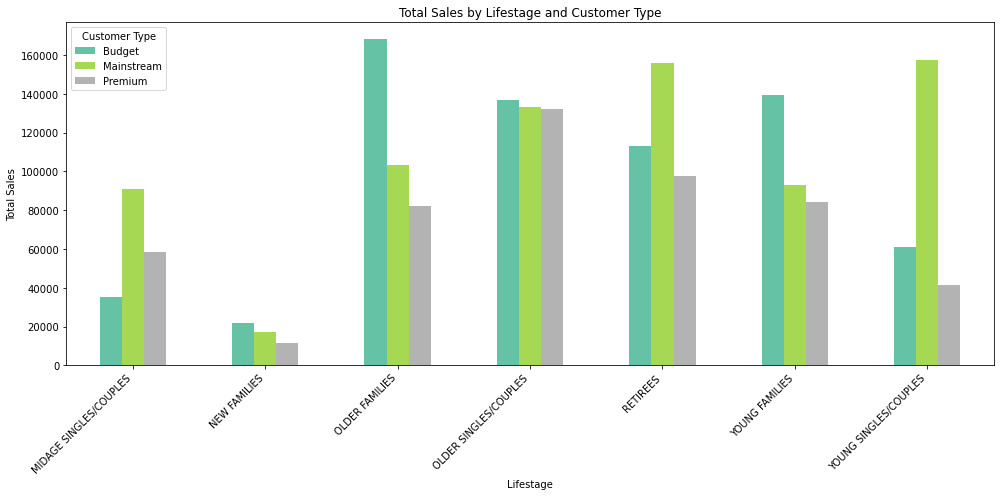

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              23160
RETIREES                Mainstream          21466
YOUNG SINGLES/COUPLES   Mainstream          20854
YOUNG FAMILIES          Budget              19122
OLDER SINGLES/COUPLES   Budget              18407
                        Mainstream          18318
                        Premium             17753
RETIREES                Budget              15201
OLDER FAMILIES          Mainstream          14244
RETIREES                Premium             13096
YOUNG FAMILIES          Mainstream          12907
MIDAGE SINGLES/COUPLES  Mainstream          11874
YOUNG FAMILIES          Premium             11563
OLDER FAMILIES          Premium             11192
YOUNG SINGLES/COUPLES   Budget               9242
MIDAGE SINGLES/COUPLES  Premium              8216
YOUNG SINGLES/COUPLES   Premium              6281
MIDAGE SINGLES/COUPLES  Budget               5020
NEW FAMILIES            Budget               3005
         

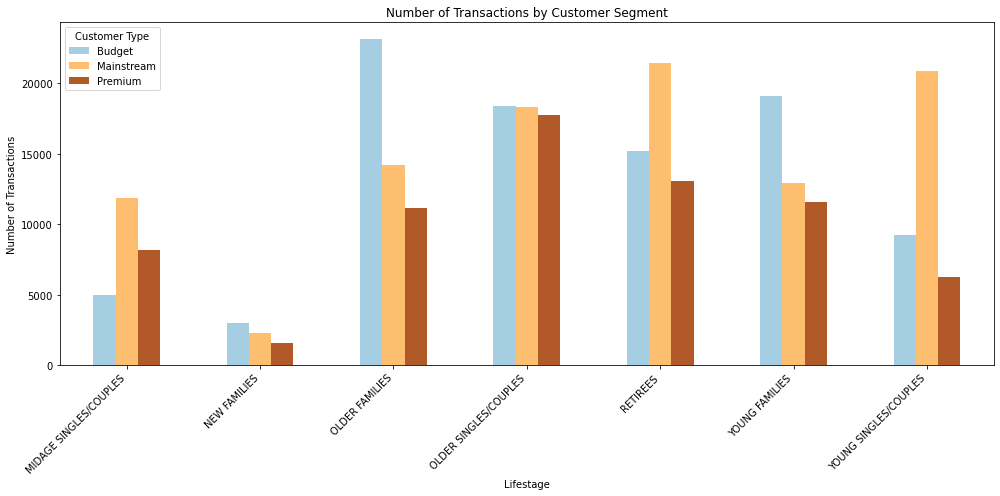

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Mainstream          7.647284
YOUNG SINGLES/COUPLES   Mainstream          7.558339
RETIREES                Premium             7.456174
OLDER SINGLES/COUPLES   Premium             7.449848
RETIREES                Budget              7.443445
OLDER SINGLES/COUPLES   Budget              7.430315
OLDER FAMILIES          Premium             7.322945
NEW FAMILIES            Mainstream          7.317806
                        Budget              7.297321
YOUNG FAMILIES          Budget              7.287201
OLDER SINGLES/COUPLES   Mainstream          7.282116
OLDER FAMILIES          Budget              7.269570
YOUNG FAMILIES          Premium             7.266756
OLDER FAMILIES          Mainstream          7.262395
RETIREES                Mainstream          7.252262
NEW FAMILIES            Premium             7.231655
YOUNG FAMILIES          Mainstream          7.189025
MIDAGE SINGLES/COUPLES  Premium             7.112056
     

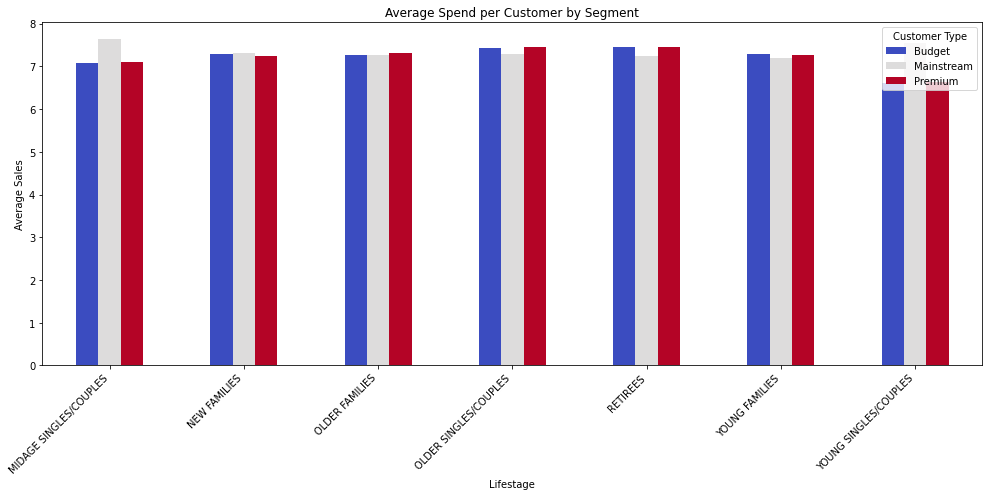

In [19]:
# 1-Total Sales by Customer Type
Customer_Segmentation = merged_data.groupby(["LIFESTAGE" , "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().sort_values( ascending = False)
print("The customer segmentation is :\n",Customer_Segmentation)
print("the describtion : \n" , Customer_Segmentation.describe())
# Visulisation total Sales by Customer Type
Customer_Segmentation.unstack().plot(kind='bar', figsize=(14, 7), colormap='Set2')
plt.title("Total Sales by Lifestage and Customer Type")
plt.ylabel("Total Sales")
plt.xlabel("Lifestage")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

# 2- Number of transactions (TXNs) by customer type
txn_count = merged_data.groupby(["LIFESTAGE" , "PREMIUM_CUSTOMER"])["TXN_ID"].count().sort_values(ascending = False)
print(txn_count)
print("the describtion : \n" , txn_count.describe())


# Visulization Number of transactions (TXNs) by customer type
txn_count.unstack().plot(kind='bar', figsize=(14, 7), colormap='Paired')
plt.title("Number of Transactions by Customer Segment")
plt.ylabel("Number of Transactions")
plt.xlabel("Lifestage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Customer Type')
plt.show()

# 3- Spend per Customer
avg_spend = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().sort_values(ascending = False)
print(avg_spend)
print("the describtion : \n" , avg_spend.describe())


# Visulization
avg_spend.unstack().plot(kind='bar', figsize=(14, 7), colormap='coolwarm')
plt.title("Average Spend per Customer by Segment")
plt.ylabel("Average Sales")
plt.xlabel("Lifestage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Customer Type')
plt.show()


### Analysis of the customer segmentation data:

1. **Total Sales by Segment:**
   - **Older Families (Budget)** have the highest total sales at 168,363.25.
   - **Young Singles/Couples (Mainstream)** and **Retirees (Mainstream)** follow closely.
   - Budget and Mainstream segments dominate sales across most lifestages.

2. **Number of Transactions:**
   - **Older Families (Budget)** also lead in transaction count with 23,160.
   - **Retirees (Mainstream)** and **Young Singles/Couples (Mainstream)** have high transaction numbers.
   - New Families have the lowest transaction counts across all customer types.

3. **Average Spend per Transaction:**
   - **Midage Singles/Couples (Mainstream)** have the highest average spend per transaction at 7.65.
   - **Young Singles/Couples (Budget)** have the lowest average spend at 6.62.
   - Average spend is relatively consistent across segments, with a slight variation.

4. **Visual Insights:**
   - The bar charts show clear differences in sales, transactions, and average spend across segments.
   - Budget and Mainstream segments are more prominent in sales and transactions.
   - Premium segments have fewer transactions but higher average spends.

5. **Business Implications:**
   - Focus marketing efforts on Older Families and Retirees, especially in Budget and Mainstream categories.
   - Consider strategies to increase transactions among New Families and Premium segments.
   - Explore ways to boost average spend in lower-performing segments like Young Singles/Couples (Budget).



# Summary and Recomendation the sales and Behavior analysis.

### Summary:

1. **Top Performing Segments:**
   - **Older Families (Budget)** lead in both total sales and transaction count.
   - **Young Singles/Couples (Mainstream)** and **Retirees (Mainstream)** also show strong sales and transaction numbers.

2. **Sales Patterns:**
   - Budget and Mainstream segments dominate sales across most lifestages.
   - Premium segments have fewer transactions but higher average spends.

3. **Average Spend:**
   - **Midage Singles/Couples (Mainstream)** have the highest average spend per transaction.
   - Average spend is consistent across segments, with slight variations.

4. **Underperforming Segments:**
   - **New Families** have the lowest transaction counts and sales.
   - **Young Singles/Couples (Budget)** have the lowest average spend.

### Recommendations:

1. **Targeted Marketing:**
   - Focus on **Older Families** and **Retirees** in Budget and Mainstream categories with tailored promotions and loyalty programs.
   - Develop campaigns to increase engagement with **Young Singles/Couples** and **New Families**.

2. **Product and Service Enhancements:**
   - Introduce product bundles or discounts for **Premium** segments to increase transaction frequency.
   - Offer personalized shopping experiences or exclusive deals for high-spending segments like **Midage Singles/Couples**.

3. **Customer Engagement:**
   - Implement feedback mechanisms to understand the needs of underperforming segments like **New Families**.
   - Use data analytics to identify potential cross-selling opportunities within high-performing segments.

4. **Operational Adjustments:**
   - Ensure inventory levels are aligned with demand patterns, especially for top-selling products.
   - Consider expanding product lines that appeal to high-spending segments.

By focusing on these strategies, you can enhance customer satisfaction, increase sales, and optimize business operations.

# Task2 :

In [20]:
QVI_data = pd.read_csv(r"C:\Users\user\Documents\Forage\QVI_data.csv")
QVI_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


## 1- Calculate monthly performance metrics for each store:

In [21]:
QVI_data["DATE"] = pd.to_datetime(QVI_data["DATE"])   #Date preprocceing

QVI_data["year_month"] = QVI_data["DATE"].dt.to_period("M")     #Extract the year and month

# Monthly performance analysis for each store
monthly_metrics = QVI_data.groupby(['STORE_NBR', 'year_month']).agg(total_sales=('TOT_SALES', 'sum'),
    total_transactions=('TXN_ID', 'nunique'),
    total_customers=('LYLTY_CARD_NBR', 'nunique')
).reset_index()


# Calculate transactions for each customer.
monthly_metrics['transactions_per_customer'] = (
    monthly_metrics['total_transactions'] / monthly_metrics['total_customers']
)

# Show the frist 20 rows
print(monthly_metrics.head(10))


   STORE_NBR year_month  total_sales  total_transactions  total_customers  \
0          1    2018-07        206.9                  52               49   
1          1    2018-08        176.1                  43               42   
2          1    2018-09        278.8                  62               59   
3          1    2018-10        188.1                  45               44   
4          1    2018-11        192.6                  47               46   
5          1    2018-12        189.6                  47               42   
6          1    2019-01        154.8                  36               35   
7          1    2019-02        225.4                  55               52   
8          1    2019-03        192.9                  49               45   
9          1    2019-04        192.9                  43               42   

   transactions_per_customer  
0                   1.061224  
1                   1.023810  
2                   1.050847  
3                   1.022727

## 3- Assessment of the Trial.

In [22]:
# Calculate the monthly sales and other metrics for each store
pre_trial_data = QVI_data[QVI_data["DATE"] < "2019-02-01"]

store_summary = monthly_metrics.groupby('STORE_NBR').agg({
    'total_sales': 'mean',
    'total_customers': 'mean',
    'total_transactions': 'mean',
    'transactions_per_customer': 'mean'
}).reset_index()

# Define the trial stores
trial_stores = [77, 86, 88]  # Trial stores

# Define a function to find the closest control store for each trial store
def find_closest_control_store(trial_store, store_summary):
    trial_data = store_summary[store_summary['STORE_NBR'] == trial_store].iloc[0]
    
    # Calculate the difference between the trial store and other stores
    store_summary['sales_diff'] = abs(store_summary['total_sales'] - trial_data['total_sales'])
    store_summary['customers_diff'] = abs(store_summary['total_customers'] - trial_data['total_customers'])
    store_summary['transactions_diff'] = abs(store_summary['total_transactions'] - trial_data['total_transactions'])
    
    # Calculate total difference
    store_summary['total_diff'] = store_summary['sales_diff'] + store_summary['customers_diff'] + store_summary['transactions_diff']
    
    # Select the store with the smallest difference
    closest_store = store_summary[store_summary['STORE_NBR'] != trial_store].sort_values('total_diff').iloc[0]
    return closest_store['STORE_NBR']

# Select control stores for each trial store
control_stores = {}
for trial_store in trial_stores:
    closest_store = find_closest_control_store(trial_store, store_summary)
    control_stores[trial_store] = closest_store

control_stores


{77: 50.0, 86: 227.0, 88: 165.0}

In [23]:
from scipy.stats import ttest_ind
trial_period = monthly_metrics[
    (monthly_metrics['year_month'] >= '2019-02') &
    (monthly_metrics['year_month'] <= '2019-07')
]

# Filter the data for trial and control stores (example: Store 77 is trial, others are control)
trial_stores = [77, 86, 88]  # Example trial stores
control_stores = [50, 227, 165]  # Example control stores

# Get the sales data for trial and control stores
trial_sales = monthly_metrics[monthly_metrics['STORE_NBR'].isin(trial_stores)]['total_sales']
control_sales = monthly_metrics[monthly_metrics['STORE_NBR'].isin(control_stores)]['total_sales']

# Perform the T-test to compare sales between trial and control stores
t_stat, p_value = ttest_ind(trial_sales, control_sales)

# Show the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in sales between trial and control stores.")
else:
    print("There is no significant difference in sales between trial and control stores.")


T-statistic: 0.10319915333159851
P-value: 0.918099999332771
There is no significant difference in sales between trial and control stores.


In [24]:
# Get the data for total customers and transactions per customer
trial_customers = monthly_metrics[monthly_metrics['STORE_NBR'].isin(trial_stores)]['total_customers']
control_customers = monthly_metrics[monthly_metrics['STORE_NBR'].isin(control_stores)]['total_customers']

trial_transactions_per_customer = monthly_metrics[monthly_metrics['STORE_NBR'].isin(trial_stores)]['transactions_per_customer']
control_transactions_per_customer = monthly_metrics[monthly_metrics['STORE_NBR'].isin(control_stores)]['transactions_per_customer']

# Perform T-tests to compare trial and control stores for each factor
t_stat_customers, p_value_customers = ttest_ind(trial_customers, control_customers)
t_stat_transactions, p_value_transactions = ttest_ind(trial_transactions_per_customer, control_transactions_per_customer)

# Show the results
print(f"Customers T-statistic: {t_stat_customers}, P-value: {p_value_customers}")
print(f"Transactions per customer T-statistic: {t_stat_transactions}, P-value: {p_value_transactions}")

# Interpretation
if p_value_customers < 0.05:
    print("There is a significant difference in the number of customers between trial and control stores.")
else:
    print("There is no significant difference in the number of customers between trial and control stores.")

if p_value_transactions < 0.05:
    print("There is a significant difference in the transactions per customer between trial and control stores.")
else:
    print("There is no significant difference in transactions per customer between trial and control stores.")


Customers T-statistic: 0.13233858360200304, P-value: 0.8950961605269707
Transactions per customer T-statistic: -0.19483477950578854, P-value: 0.8460866786904981
There is no significant difference in the number of customers between trial and control stores.
There is no significant difference in transactions per customer between trial and control stores.


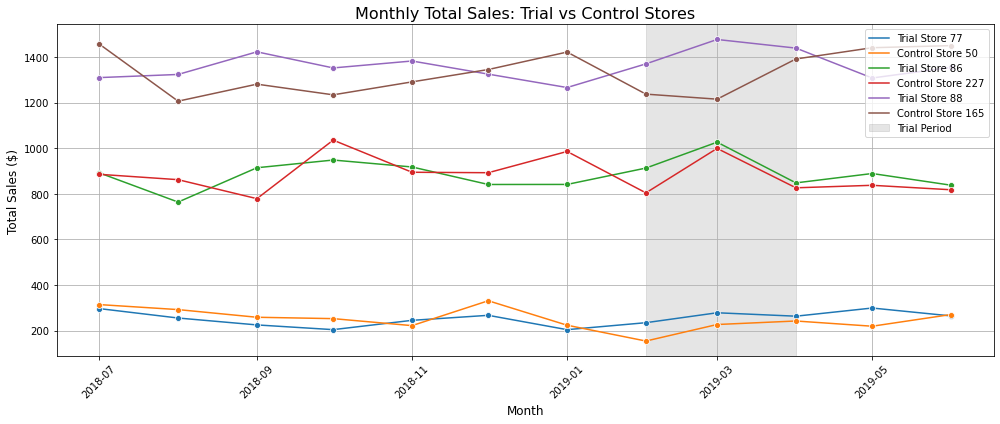

In [25]:

# Choose test and control stores.
trial_control_pairs = {77: 50, 86: 227, 88: 165}

# prepare the drawing data and add a column showing the type of store.plot_data = []
plot_data = []
for trial_store, control_store in trial_control_pairs.items():
    for store, store_type in [(trial_store, "Trial"), (control_store, "Control")]:
        store_data = monthly_metrics[monthly_metrics["STORE_NBR"] == store].copy()
        store_data["store_type"] = store_type
        store_data["group"] = f"{store_type} Store {store}"
        plot_data.append(store_data)

plot_df = pd.concat(plot_data)

# Convert year_month to date to draw easily
plot_df["date"] = plot_df["year_month"].astype(str)
plot_df["date"] = pd.to_datetime(plot_df["date"])

# visulization
plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_df, x="date", y="total_sales", hue="group", marker="o")

#teaching the trial period
plt.axvspan(pd.to_datetime("2019-02"), pd.to_datetime("2019-04"), color="gray", alpha=0.2, label="Trial Period")

plt.title("Monthly Total Sales: Trial vs Control Stores", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
